<a href="https://colab.research.google.com/github/veimahardhika/Notebook/blob/main/Metnum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BISECTION
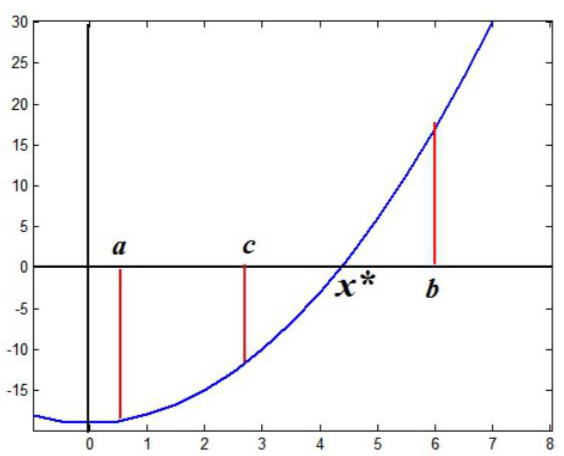

In [ ]:
import numpy as np

def bisect(f,a,b,eps,itermax): #input fungsinya f (fungsi), a (batas 1), b (batas 2), eps (error), itermax (sudah jelas)
    print("|Iterasi\t| |a-b| \t|") # ini buat tampilan aja, \t = tab

    for i in range(itermax): #looping sampe itermax
        c=(a+b)/2
        fa=f(a) #Masukin nilai a ke fungsi f, bawah sama aja
        fb=f(b)
        fc=f(c)

        if (fa*fc)<0: #kalo hasi f(a)*f(c)<0
            a=a
            b=c
        elif (fb*fc)<0:
            a=c
            b=b
        print(f"|\t{i}|{abs(a-b):.6e}\t|") #tampilan aja; ":.6e" artinya tampilan variable abs(a-b) dalam bentuk eksponen dengan 6 angka dibelakang koma; e=eksponen, f=float
        if abs(a-b)<eps: #kalo a-b < eps, berhenti loopnya. solusi didapatkan, kalo masih belum lanjut looping lagi
            break
    return(c,i) #output nilai c dan i akhir, c = akar. i = iterasi

print("y=e^x - 5x^2 pada daerah [0,1]")
y=lambda x: np.exp(x) - 5*x**2 #define fungsi f
c,i=bisect(y,0,1,0.00001,12) #njalanin fungsi bisect dengan variable tertera, outputnya disempen berturut-turut ke dalam fungsi c dan i

print('Iterasi berhenti di iterasi ke:', i) #nampilin hasil akhirnya
print('dengan nilai solusi:', c)

y=e^x - 5x^2 pada daerah [0,1]
|Iterasi	| |a-b| 	|
|	0|5.000000e-01	|
|	1|2.500000e-01	|
|	2|1.250000e-01	|
|	3|6.250000e-02	|
|	4|3.125000e-02	|
|	5|1.562500e-02	|
|	6|7.812500e-03	|
|	7|3.906250e-03	|
|	8|1.953125e-03	|
|	9|9.765625e-04	|
|	10|4.882812e-04	|
|	11|2.441406e-04	|
Iterasi berhenti di iterasi ke: 11
dengan nilai solusi: 0.605224609375


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# NEWTON_RAPHSON
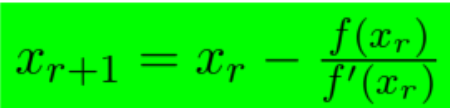

In [ ]:
import numpy as np

def f(x):
    return x**2-2*x-2

def g(x):
    return 2*x-2

def newra(x0, e, N):
    xn = x0
    for n in range(0,N):
        fxn=f(xn)
        if abs(fxn)<e:
            print('Solusi diperoleh setelah',n,'iterasi')
            return xn
        gxn=g(xn)
        if gxn==0:
            print('pembagi nol. tidak ada solusi [spt matkul ini]')
            return None
        xn=xn-(fxn/gxn)
        print(f'iterasi ke-{n}, xn = {xn:.6f} dan f(xn) = {f(xn):.6f}')
    print('melebihi iterasi maks. solusi tidak ditemukan')
    return None

x0=input('Dugaan awal:')
e=input('Epsilon:')
N=input('Iterasi maks:')

x0=float(x0)
e=float(e)
N=int(N)

Perkiraan=newra(x0, e, N)
print(f'Nilai Solusi = {Perkiraan}')

Dugaan awal:1.5
Epsilon:0.0001
Iterasi maks:10
iterasi ke-0, xn = 4.250000 dan f(xn) = 7.562500
iterasi ke-1, xn = 3.086538 dan f(xn) = 1.353643
iterasi ke-2, xn = 2.762163 dan f(xn) = 0.105219
iterasi ke-3, xn = 2.732308 dan f(xn) = 0.000891
iterasi ke-4, xn = 2.732051 dan f(xn) = 0.000000
Solusi diperoleh setelah 5 iterasi
Nilai Solusi = 2.7320508266751493


#Regula Falsi
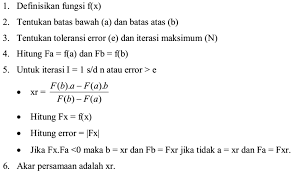

In [ ]:
def f(x):
    return 2*x**3-2*x-5

def falsePosition(x0,x1,e):
    iterasi = 1 #start iterasi pertama
    print('\n\n*** METODE REGULA FALSI ***') #\n = new line
    condition = True #set true
    while condition: # kalo condition = True njalanin ini; Kalo = False, skip
        x2 = x0 - (x1-x0) * f(x0)/( f(x1) - f(x0) )
        print(f'Iteration-{iterasi}, x2 = {x2:.6f} and f(x2) = {f(x2):.6f}')

        if f(x0) * f(x2) < 0: #GaJELAS
            x1 = x2
        else:
            x0 = x2

        iterasi = iterasi + 1 #nyatet iterasi tambah 1
        condition = abs(f(x2)) > e #syaratnya kalo f(x2) < e berarti ga memenuhi Kondisi, jadinya condition = False

    print(f'\nRequired root is: {x2:.8f}') #nampilin hasil akhirnya

x0 = float(input('Dugaan awal: '))
x1 = float(input('Dugaan kedua: '))
e = float(input('Epsilon (toleransi galat): '))

if f(x0) * f(x1) > 0.0: #ngecek akarnya ada diantar 2 titik itu; disini ngecek kalo ga ada, print kalimat dibawah
    print('\nTidak memenuhi f(x0) * f(x1) < 0, akar tidak terdapat diantara x0 dan x1')
    print('Try Again with different guess values.')
else: #kalo ada jalanin fungsi dibawah
    falsePosition(x0,x1,e)

Dugaan awal: 0
Dugaan kedua: 2
Epsilon (toleransi galat): 0.001


*** METODE REGULA FALSI ***
Iteration-1, x2 = 0.833333 and f(x2) = -5.509259
Iteration-2, x2 = 1.347150 and f(x2) = -2.804647
Iteration-3, x2 = 1.533900 and f(x2) = -0.849732
Iteration-4, x2 = 1.584355 and f(x2) = -0.214675
Iteration-5, x2 = 1.596723 and f(x2) = -0.051682
Iteration-6, x2 = 1.599678 and f(x2) = -0.012297
Iteration-7, x2 = 1.600380 and f(x2) = -0.002918
Iteration-8, x2 = 1.600547 and f(x2) = -0.000692

Required root is: 1.60054681


# TUGAS
### **Kalo X0=0 namanya McLaurin**
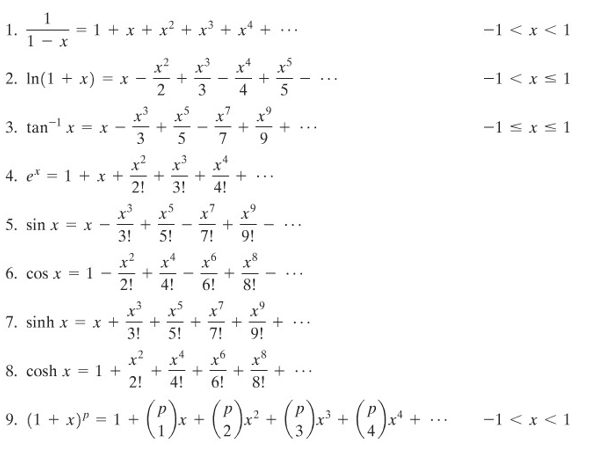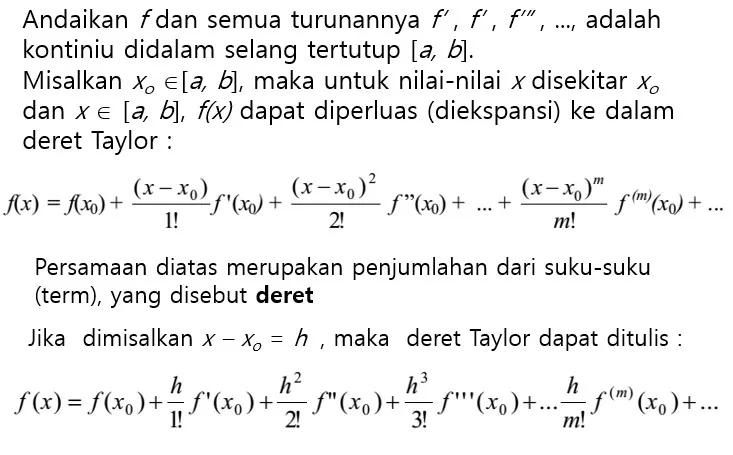

###e*x Newton_Repson

In [ ]:
import numpy as np

def f(x):
    return np.exp(x)

def g(x):
    return np.exp(x)

# Newton-Raphson Method
def newton_raphson(x0, e, N):
    xn = x0
    for n in range(N):
        fxn = f(xn)
        if abs(fxn) < e:
            print('Solution found after', n, 'iterations.')
            return xn
        gxn = g(xn)
        if gxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn / gxn
        print('Iteration:', n, '| x:', xn, '| f(x):', fxn)
    print('Exceeded maximum iterations. No solution found.')
    return None

# Input
x0 = float(input('Initial guess: '))
e = float(input('Epsilon: '))
N = int(input('Maximum iterations: '))

# Initial Program
solution = newton_raphson(x0, e, N)
print('Approximate solution:', solution)



Initial guess: -1
Epsilon: 0.0001
Maximum iterations: 10
Iteration: 0 | x: -2.0 | f(x): 0.36787944117144233
Iteration: 1 | x: -3.0 | f(x): 0.1353352832366127
Iteration: 2 | x: -4.0 | f(x): 0.049787068367863944
Iteration: 3 | x: -5.0 | f(x): 0.01831563888873418
Iteration: 4 | x: -6.0 | f(x): 0.006737946999085467
Iteration: 5 | x: -7.0 | f(x): 0.0024787521766663585
Iteration: 6 | x: -8.0 | f(x): 0.0009118819655545162
Iteration: 7 | x: -9.0 | f(x): 0.00033546262790251185
Iteration: 8 | x: -10.0 | f(x): 0.00012340980408667956
Solution found after 9 iterations.
Approximate solution: -10.0


###untuk ln(x+1) Newton_Repson

In [ ]:
import numpy as np

def f(x):
    return np.log(x + 1)

def g(x):
    return 1 / (x + 1)

# Newton-Raphson Method
def newton_raphson(x0, e, N):
    xn = x0
    for n in range(N):
        fxn = f(xn)
        if abs(fxn) < e:
            print('Solution found after', n, 'iterations.')
            return xn
        gxn = g(xn)
        if gxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn / gxn
        print('Iteration:', n, '| x:', xn, '| f(x):', fxn)
    print('Exceeded maximum iterations. No solution found.')
    return None

# Input
x0 = float(input('Initial guess: '))
e = float(input('Epsilon: '))
N = int(input('Maximum iterations: '))

# Initial Program
solution = newton_raphson(x0, e, N)
print('Approximate solution:', solution)


Initial guess: 0.1
Epsilon: 0.00001
Maximum iterations: 10
Iteration: 0 | x: -0.004841197784757431 | f(x): 0.09531017980432493
Iteration: 1 | x: -1.1737554587683448e-05 | f(x): -0.004852954341979669
Iteration: 2 | x: -6.888532606946752e-11 | f(x): -1.1737623473353628e-05
Solution found after 3 iterations.
Approximate solution: -6.888532606946752e-11


###e*x (taylor)

In [ ]:
import math as mt

def faktorial(n): #definisi fungsi faktorial
    if n == 0: # kalo n=0, nilai = 1
        return 1
    else:
        return n * faktorial(n-1) #n*(n-1)....0!

def fungsi_exp(x, n): #inputnya x sama n
    exp_appx = 0 #buat nyimpen nilainya
    for i in range(n): #looping sampe n
        coef = 1
        num = x ** i
        denom = faktorial(i)
        exp_appx += (coef) * ((num) / (denom)) #intinya fungsi deretnya e^x, terus nambahin hasil dari per-iterasinya ke exp_appx (exp_appx = i1+i2+...+in)
    return exp_appx #output exp_appx

x = float(input("Nilai x: "))
n = int(input("Orde: "))
out_approx = fungsi_exp(x, n) #manggil fungsi_exp, outputnya disimpen dalam variable out_approx
out_exact = mt.exp(x) #cari nilai eksaknya pake math

print("Hasil perkiraan deret Taylor orde", n, "adalah:", out_approx)
print("Hasil eksaknya adalah:", out_exact)

absolute_error = abs(out_approx - out_exact)
relative_error_to_exact = (absolute_error / out_exact) * 100
relative_error_to_approx = (absolute_error / out_approx) * 100

print("Galat mutlak adalah:", absolute_error)
print("Galat relatif terhadap nilai eksak adalah:", relative_error_to_exact, "%")
print("Galat relatif terhadap nilai perkiraan adalah:", relative_error_to_approx, "%")


Nilai x: 4
Orde: 10
Hasil perkiraan deret Taylor orde 10 adalah: 54.15414462081129
Hasil eksaknya adalah: 54.598150033144236
Galat mutlak adalah: 0.4440054123329489
Galat relatif terhadap nilai eksak adalah: 0.8132242796933814 %
Galat relatif terhadap nilai perkiraan adalah: 0.8198918391969557 %


### ln(x+1) (taylor)

In [ ]:
import math as mt

def faktorial(n): # faktorial sama kek atas
    if n == 0:
        return 1
    else:
        return n * faktorial(n-1)

def fungsi_ln(x,n): #iff |x|<1
    if x >= 1 or x <= -1:
        print("\nDERET DIVERGEN! |x| harus kurang dari sama dengan 1\n")
    ln_appx = 0 #buat nyimpen hasil iterasinya
    for i in range(1, n+1):
        coef = (-1) ** (i-1)
        num = x ** i
        denom = i
        ln_appx += (coef) * ((num) / (denom)) #nambahin hasil iterasinya ke ln_approx
    return ln_appx #output nilai ln_appx

x = float(input("Nilai x: "))
n = int(input("Orde: "))
out_a = fungsi_ln(x,n)
out_b = mt.log1p(x)

print(f"Hasil deret Taylor orde {n} adalah {out_a}")
print(f"Hasil eksaknya adalah {out_b}")

galat_mutlak = abs(out_a-out_b)
galat_relatifoeksak = (galat_mutlak/out_b)*100
galat_relatifopdkt = (galat_mutlak/out_a)*100

print(f"Galat mutlak adalah {galat_mutlak}")
print(f"Galat relatif terhadap nilai eksak adalah {galat_relatifoeksak}%")
print(f"Galat relatif terhadap nilai hampiran adalah {galat_relatifopdkt}%")

Nilai x: 0.5
Orde: 10
Hasil deret Taylor orde 10 adalah 0.4054346478174603
Hasil eksaknya adalah 0.4054651081081644
Galat mutlak adalah 3.046029070408185e-05
Galat relatif terhadap nilai eksak adalah 0.007512432042846969%
Galat relatif terhadap nilai hampiran adalah 0.0075129964515997785%


###Cosinus Deret tylor

In [ ]:
import math as mt
def faktorial (n):
    if n==0:
        return 1
    else:
        return n*faktorial(n-1)

def fungsi_cos(y,n):
    cos_appx=0
    for i in range(n):
        coef=(-1)**i
        num=y**(2*i)
        denom=faktorial(2*i)
        cos_appx += (coef)*((num)/(denom))
    return cos_appx

sudut=float(input("Besar sudut (derajat): "))
angle_rad=(mt.radians(sudut))
n=int(input("Orde: "))
out_a=fungsi_cos(angle_rad,n)
out_b=mt.cos(angle_rad)

print(f"Hasil deret Taylor orde {n} adalah {out_a}")
print(f"Hasil eksaknya adalah {out_b}")

galat_mutlak=abs(out_a-out_b)
galat_relatifoeksak=(galat_mutlak/out_b)*100
galat_relatifopdkt=(galat_mutlak/out_a)*100

print(f"Galat mutlak adalah {galat_mutlak}")
print(f"Galat relatif terhadap nilai eksak adalah {galat_relatifoeksak:.11f}%")
print(f"Galat relatif terhadap nilai hampiran adalah {galat_relatifopdkt:.11f}%")

besar sudut digunakan
0
orde yg digunakan
10
hasil deret Taylor orde 10 adalah 1.0
hasil eksaknya adalah 1.0
galat mutlak adalah 0.0
galat relatif thd nilai eksak adalah 0.0 %
galat relatif thd nilai hampiran adalah 0.0 %


###Sinus Deret tylor

In [ ]:
import math as mt
def faktorial (n):
    if n==0:
        return 1
    else:
        return n*faktorial(n-1)

def fungsi_sin(y,n):
    sin_appx=0
    for i in range(n):
        coef=(-1)**i
        num=y**((2*i)+1)
        denom=faktorial((2*i)+1)
        sin_appx += (coef)*((num)/(denom))
    return sin_appx

sudut=float(input("Besar sudut (derajat): "))
angle_rad=(mt.radians(sudut))
n=int(input("Orde: "))
out_a=fungsi_sin(angle_rad,n)
out_b=mt.sin(angle_rad)

print(f"Hasil deret Taylor orde {n} adalah {out_a}")
print(f"Hasil eksaknya adalah {out_b}")

galat_mutlak=abs(out_a-out_b)
galat_relatifoeksak=(galat_mutlak/out_b)*100
galat_relatifopdkt=(galat_mutlak/out_a)*100

print(f"Galat mutlak adalah {galat_mutlak}")
print(f"Galat relatif terhadap nilai eksak adalah {galat_relatifoeksak:.11f}%")
print(f"Galat relatif terhadap nilai hampiran adalah {galat_relatifopdkt:.11f}%")

Besar sudut (derajat): 30
Orde: 5
Hasil deret Taylor orde 5 adalah 0.5000000000202799
Hasil eksaknya adalah 0.49999999999999994
Galat mutlak adalah 2.0279944390466653e-11
Galat relatif terhadap nilai eksak adalah 0.00000000406%
Galat relatif terhadap nilai hampiran adalah 0.00000000406%


In [ ]:
def f(x):
    return x**2-2*x-2

def secant(x1, x2, E):
    n = 0; xm = 0; x0 = 0; c = 0;
    if (f(x1) * f(x2) < 0):
        while True:
          x0 = ((x1 * f(x2) - x2 * f(x1))/(f(x2) - f(x1)))

          c = f(x1) * f(x0)

          x1 = x2
          x2 = x0

          n += 1

          if (c == 0):
              break
          xm = ((x1 * f(x2) - x2 * f(x1))/(f(x2) - f(x1)))

          if(abs(xm - x0) < E):
              break

        print("Solusi Persamaan =", (x0))
        print("Iterasi ke-", n)

    else:
        print("Interval tidak memuat solusi")

x1 = 1.5
x2 = 3
E = 0.0001
secant(x1, x2, E)

Solusi Persamaan = 2.7320496961221967
Iterasi ke- 4
